# Part 1, exploratory data analysis (EDA)

Вопросы:

1. [1 из 2] Загрузка данных и предобработка - загрузите датасет, посмотрите на его `head` и `tail`. Похоже, некоторые факторы,  которые на самом деле числовые, у нас с вами замусорены. Так, например, фактор "Weight" содержит в себе совершенно бесполезную приписку `kg`, аналогично с "Ram", а в  факторе "ScreenResolution" и вовсе цифры спрятаны после значительного куска текста. Давайте-ка всё почистим! Со "ScreenResolution" я уже разобрался, создав две новые переменные, теперь ваша очередь справиться с весом и оперативной памятью :) Воспользуйтесь функцией `describe()` для отображения базовых статистик переменных.
2. [1 балл] Какова средняя цена компьютеров в евро?
3. [1 балл] У скольких компьютеров оперативной  памяти 16 гигабайт?
4. [1 балл] Сколько компьютеров с диагонялью 13.3 дюйма произвела компания Apple?
5. [1 балл] Визуализация - Постройте гистограммы всех числовых переменных датасета при помощи одной команды. Для удобства отображения задайте размер графика `figsize` равным (25, 20).
6. [1 из 2] Визуализация - При помощи `heatmap` постройте тепловую карту корреляций для всего датасета, подписав на графике все значения коэффициентов корреляции. Какой фактор наиболее сильно **положительно** скоррелирован с ценой? Теперь постройте такой же график, но только для Нетбуков. Какой фактор сильнее всего **положительно** скоррелирован с ценой теперь? Нацонец, постройте такой же график для Ультрабуков. Какой фактор сильнее всего **отрицательно** скоррелирован с ценой? Попробуйте объяснить, почему так происходит?
7. [2 балла] Группировка + Визуализация - при помощи `groupby` посчитайте  средние  значения цены для каждого возможного типа компьютера. Добавьте `.plot.bar()` для построения столбчатой диаграммы цены. Какой тип компьютеров, в среднем, самый дорогой? Постройте аналогичный график, сгруппировав значения по названию компании-производителя. У какой компании самые дорогие компьютеры? А самые дешевые?

## Итого 8 баллов

### Комментарий  к решению
С загрузкой всё хорошо, только вот появился столбец под загадочным названием `Unnamed: 0`, который подозрительно совпадает с индексом - дело в том, что в датасете первый столбец и есть индекс и можно было питону на это указать :)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Anastasia_Gorbunova_laptops.csv', index_col=0)

In [3]:
df.head(2)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94


In [12]:
df=pd.read_csv('Anastasia_Gorbunova_laptops.csv')
df

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.10,400.00
6,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,2139.97
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,1158.70
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.30,1495.00
9,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,770.00


In [13]:
df.head(5)

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [14]:
df.tail(5)

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.0
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.0
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.0
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.0
1302,1320,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.20,369.0


### Комментарий  к решению
А куда делся мой код, который очищал переменные? 

In [4]:
# преобразовываем в лист разбиением строки по пробелам
ScreenResolution_parsed = df.ScreenResolution.str.split()
print("Первое разбиение")
print(ScreenResolution_parsed[:5])

# достаем только цифры и еще  раз их разбиваем, теперь уже по "x"
ScreenResolution_parsed = ScreenResolution_parsed.apply(lambda x: x[-1].split('x'))
print("\nВторое разбиение")
print(ScreenResolution_parsed[:5])

# создаем две новые переменные, не забывая перегнать их в int 
df['ScreenWidth'] = ScreenResolution_parsed.apply(lambda x: x[0]).astype(int)
df['ScreenHeight'] = ScreenResolution_parsed.apply(lambda x: x[1]).astype(int)

df.head()

Первое разбиение
1    [IPS, Panel, Retina, Display, 2560x1600]
2                                  [1440x900]
3                       [Full, HD, 1920x1080]
4    [IPS, Panel, Retina, Display, 2880x1800]
5    [IPS, Panel, Retina, Display, 2560x1600]
Name: ScreenResolution, dtype: object

Второе разбиение
1    [2560, 1600]
2     [1440, 900]
3    [1920, 1080]
4    [2880, 1800]
5    [2560, 1600]
Name: ScreenResolution, dtype: object


,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,ScreenWidth,ScreenHeight
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560,1600
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440,900
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920,1080
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880,1800
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560,1600


И вот этот кусочек тоже почему-то пропал, хотя им стоило воспользоваться. Дело в том, что когда вы преобразовываете переменную в новый тип, необходимо убедиться, что это преобразование действительно запишется в датасет, поэтому синтаксис для преобразований должен быть следующий: то\_что\_изменяем = то\_что\_изменяем.изменение()

In [ ]:
# уберите "kg" из строки и преобразуйте во float
df.Weight = df.Weight.str.strip(ваш_код_здесь).astype(и_здесь)

# по аналогии избавтесь от ненужных букв в переменной Ram
df.Ram =

In [9]:
df.Weight = df.Weight.str.strip('kg').astype(float)
df.Ram = df.Ram.str.strip('GB').astype(int)

In [6]:
df.Weight.astype(float)
df = df.replace('4GB', '4')
df = df.replace('8GB', '8')
df = df.replace('16GB','16')
df = df.replace('2GB','2')
df = df.replace('32GB','32')
df = df.replace('6GB','6')
df = df.replace('12GB','12')
df = df.replace('64GB','64')
df = df.replace('24GB','24')
df.Ram.astype(float)
df.Inches.astype(float)

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Inches,1295.0,15.030270,1.415632,10.10,14.0,15.60,15.600,18.4
Weight,1295.0,2.044147,0.663120,0.69,1.5,2.04,2.305,4.7
Price_euros,1295.0,1124.317266,700.193254,174.00,599.0,977.00,1489.495,6099.0


Теперь после изменений у нас стало побольше интересных переменных

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Inches,1303.0,15.017191,1.426304,10.10,14.0,15.60,15.60,18.4
Ram,1303.0,8.382195,5.084665,2.00,4.0,8.00,8.00,64.0
Weight,1303.0,2.038734,0.665475,0.69,1.5,2.04,2.30,4.7
Price_euros,1303.0,1123.686992,699.009043,174.00,599.0,977.00,1487.88,6099.0
ScreenWidth,1303.0,1894.784344,494.641028,1366.00,1600.0,1920.00,1920.00,3840.0
ScreenHeight,1303.0,1070.830391,284.519410,768.00,900.0,1080.00,1080.00,2160.0


### Комментарий  к решению
Здесь всё верно :) 

In [17]:
print('Средняя цена компьютеров в евро', df.Price_euros.mean())

Средняя цена компьютеров в евро 1124.3172664092667


### Комментарий  к решению
И здесь тоже

In [18]:
a = int(df.loc[:,['Ram']][df['Ram'] == '16'].count())
print('Количество компьютеров c оперативной памятью 16 Гб', a)

Количество компьютеров c оперативной памятью 16 Гб 200


### Комментарий  к решению
Отлично :)

In [27]:
df[(df['Company'] == 'Apple') & (df['Inches'] == 13.3)]['Company'].count()

10

### Комментарий  к решению
И здесь всё правильно, а ниже можно посмотреть на гистограммы бОльшего числа переменных ;)

No handles with labels found to put in legend.


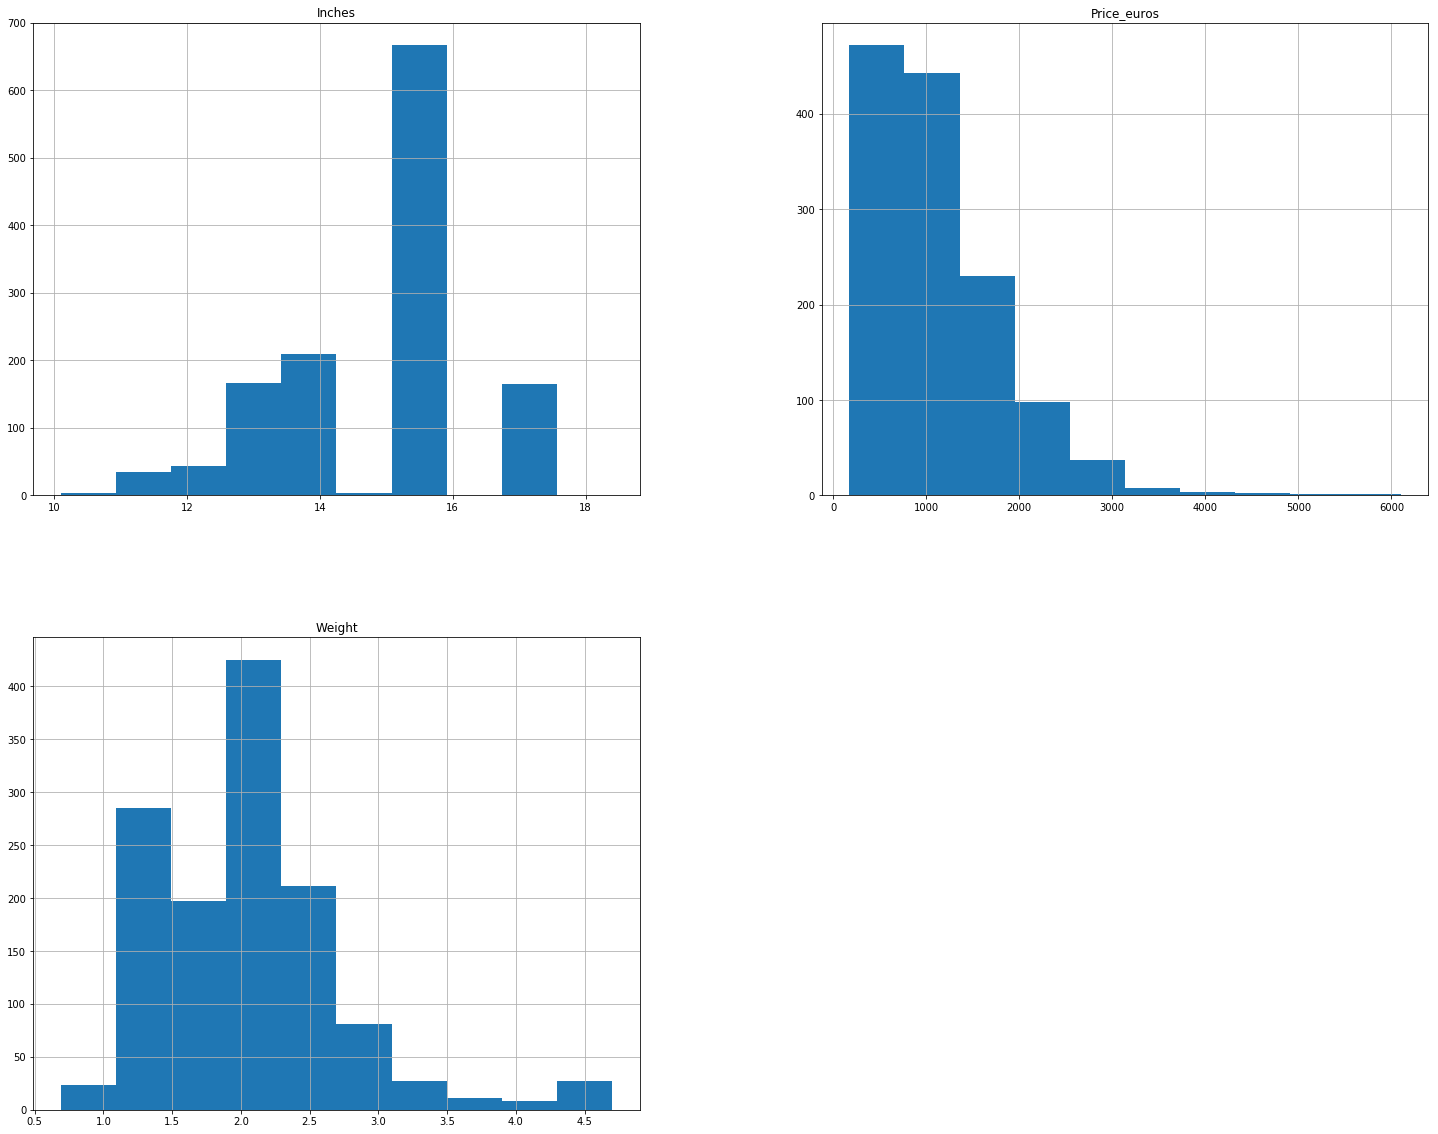

In [17]:
df.hist(figsize=(25,20));plt.legend()

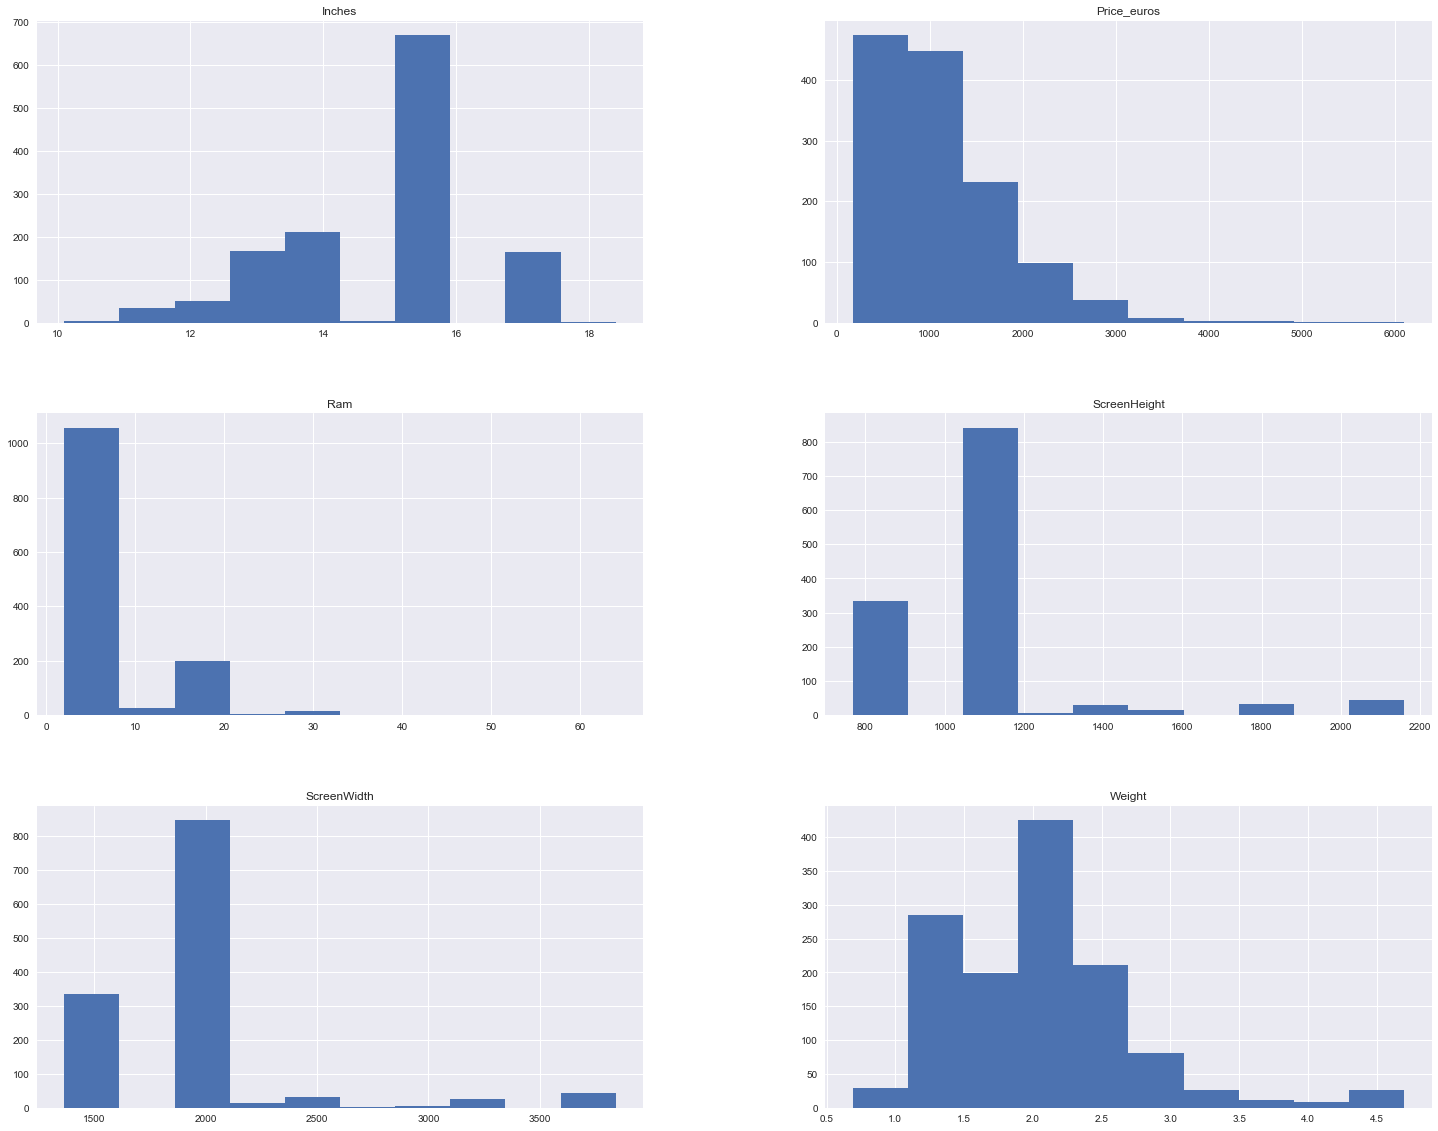

In [13]:
df.hist(figsize=(25,20));

### Комментарий  к решению
Хорошо, только вот из-за небольшого числа переменных интересные зависимости для каждого типа компов выявить не вышло, давайте  ниже посмотрим, что там интересного можно нарыть :)

Диагональ экрана наиболее сильно положительно скоррелирована с ценой


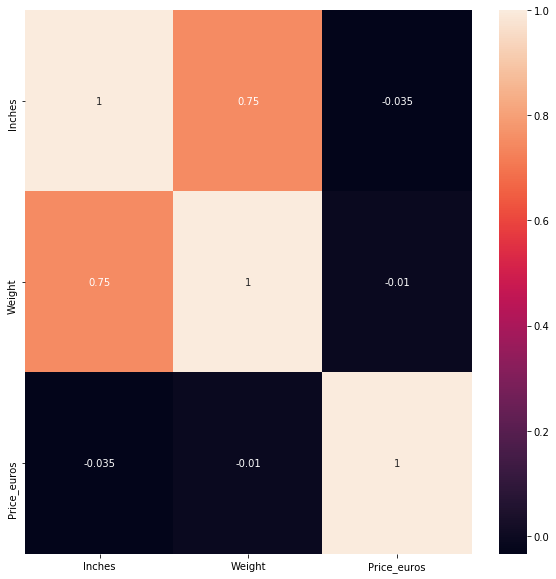

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr('kendall'),annot=True)
print('Диагональ экрана наиболее сильно положительно скоррелирована с ценой')

### Сначала просто хитмап по всем
Наиболее положительно скоррелирован с ценой скоррелирован объем оперативной памяти - Ram, что логично, - это один из самых дорогих элементов компа

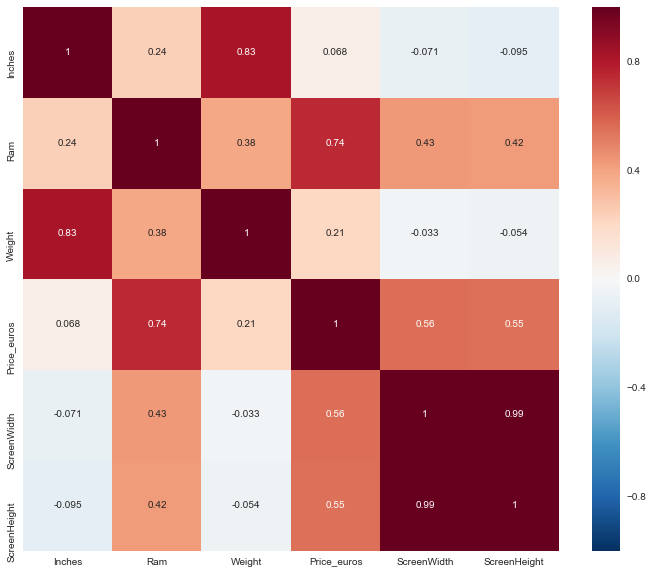

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True);

### Теперь только нетбуки
А вот у нетбуков цена гораздо сильнее зависит от диагонали экрана - обычно нетбуки супер-маленькие и дешевые, а вот штуки побольше уже будет значительно дороже

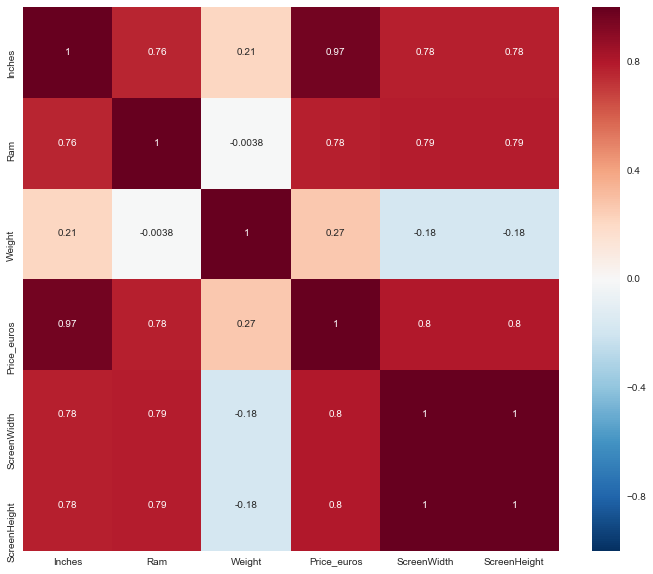

In [19]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[df.TypeName=='Netbook'].corr(), annot=True);

### Наконец, ультрабуки
У ультрабуков снова Ram выходит на первое место по положительной корреляции, а еще появилась интересная зависимость от веса. Если раньше пользователям было более-менее плевать на него, то сейчас он стал отрицательно влиять на цену, то есть чем тяжелее ультрабук, тем он дешевле! И это логично, ведь ультрабук тем и ультра, что он должен быть супер-лёгким :)

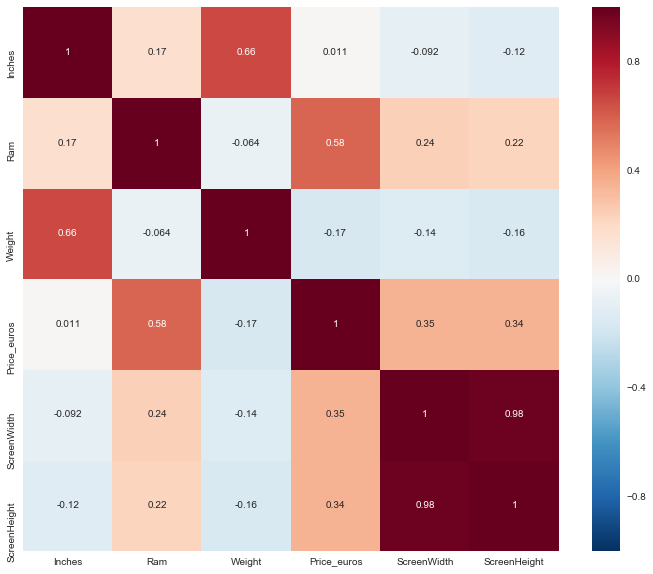

In [20]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[df.TypeName=='Ultrabook'].corr(), annot=True);

In [11]:
df.groupby('Price_euros').mean()

,Inches,Weight
Price_euros,,
174.00,11.600,1.3000
191.90,11.600,0.9800
196.00,13.300,1.3500
199.00,14.800,1.9200
202.90,14.000,1.2200
209.00,12.600,1.4275
210.80,14.000,1.4500
224.00,15.600,2.0000
229.00,14.000,1.4850


### Комментарий  к решению
Отлично, очень крутые распределения получились (хотя и ответ на самые дорогие и дешевые компании неверный), а вообще на вопрос можно было ответить и при помощи вот этих двух строчек ;)

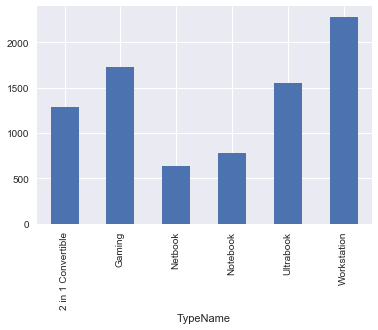

In [23]:
df.groupby('TypeName').Price_euros.mean().plot.bar();

Все-таки самые дорогие компы у Razer, который как раз игровые платформы и делает, а самые дешевые у какого-то Vero

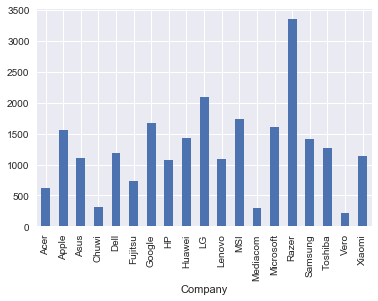

In [24]:
df.groupby('Company').Price_euros.mean().plot.bar();

Самый дорогой тип компьютеров - Gaming


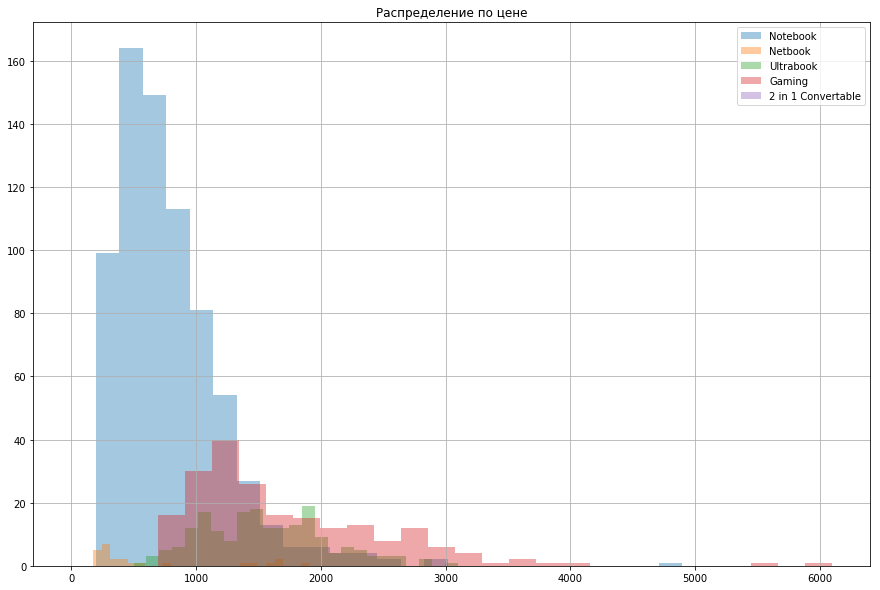

In [12]:
plt.figure(figsize=(15,10))
df['Price_euros'][df.TypeName=='Notebook'].hist(bins=25,alpha=0.4, label='Notebook')
df['Price_euros'][df.TypeName=='Netbook'].hist(bins=25,alpha=0.4, label='Netbook')
df['Price_euros'][df.TypeName=='Ultrabook'].hist(bins=25,alpha=0.4, label='Ultrabook')
df['Price_euros'][df.TypeName=='Gaming'].hist(bins=25,alpha=0.4, label='Gaming')
df['Price_euros'][df.TypeName=='2 in 1 Convertable'].hist(bins=25,alpha=0.4, label='2 in 1 Convertable')
plt.legend()
plt.title("Распределение по цене")
print ('Самый дорогой тип компьютеров - Gaming')

Самые дорогие компьютеры у компании Lenovo
Самые дешевые компьютеры у компании Dell


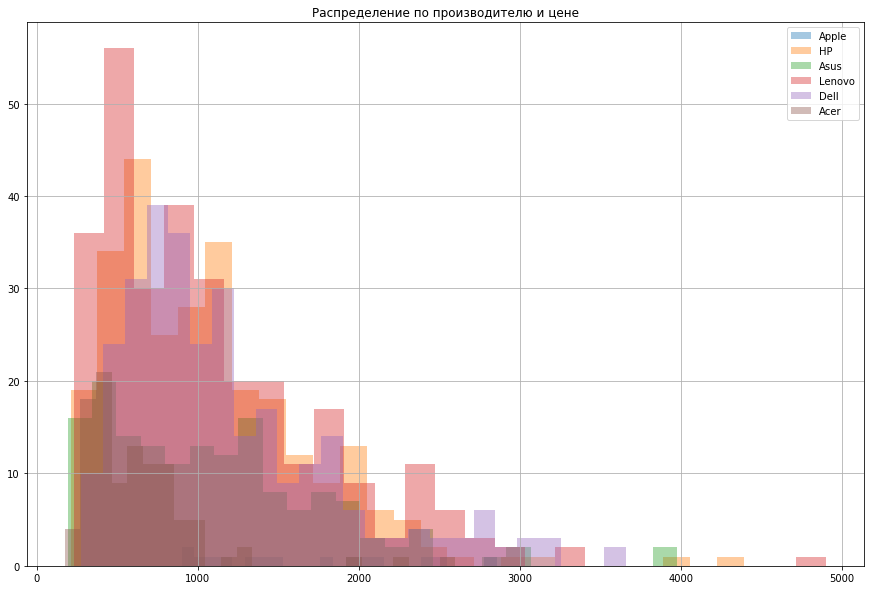

In [14]:
plt.figure(figsize=(15,10))
df['Price_euros'][df.Company=='Apple'].hist(bins=25,alpha=0.4, label='Apple')
df['Price_euros'][df.Company=='HP'].hist(bins=25,alpha=0.4, label='HP')
df['Price_euros'][df.Company=='Asus'].hist(bins=25,alpha=0.4, label='Asus')
df['Price_euros'][df.Company=='Lenovo'].hist(bins=25,alpha=0.4, label='Lenovo')
df['Price_euros'][df.Company=='Dell'].hist(bins=25,alpha=0.4, label='Dell')
df['Price_euros'][df.Company=='Acer'].hist(bins=25,alpha=0.4, label='Acer')

plt.legend()
plt.title("Распределение по производителю и цене")
print('Самые дорогие компьютеры у компании Lenovo')
print('Самые дешевые компьютеры у компании Dell')